## Testing Visualizations

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn import datasets


## Set up the Dosenbach ROIs

In [6]:

dosenbach = datasets.fetch_coords_dosenbach_2010()

# pulled from nilearn example
coords = np.vstack((
    dosenbach.rois['x'],
    dosenbach.rois['y'],
    dosenbach.rois['z'],
)).T

# making the region names and network names "pretty"
labels = [label.strip('0123456789\'\ \'').replace("b'","") for label in dosenbach.labels]
networks = [network.decode().title() for network in dosenbach.networks]

# the colors i chose, arbitrarily (same number of colors as there are networks)
colors = ['pink', 'black', 'blue', 'yellow', 'red', 'orange']

# associate each network with a color
color_dict = {network.decode().title(): color for network, color in zip(np.unique(dosenbach.networks), colors)}

# each region within the same network gets the same color
color_networks = [color_dict[network] for network in networks]


/home/james/bin/miniconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))


## Load in correlation array and plot

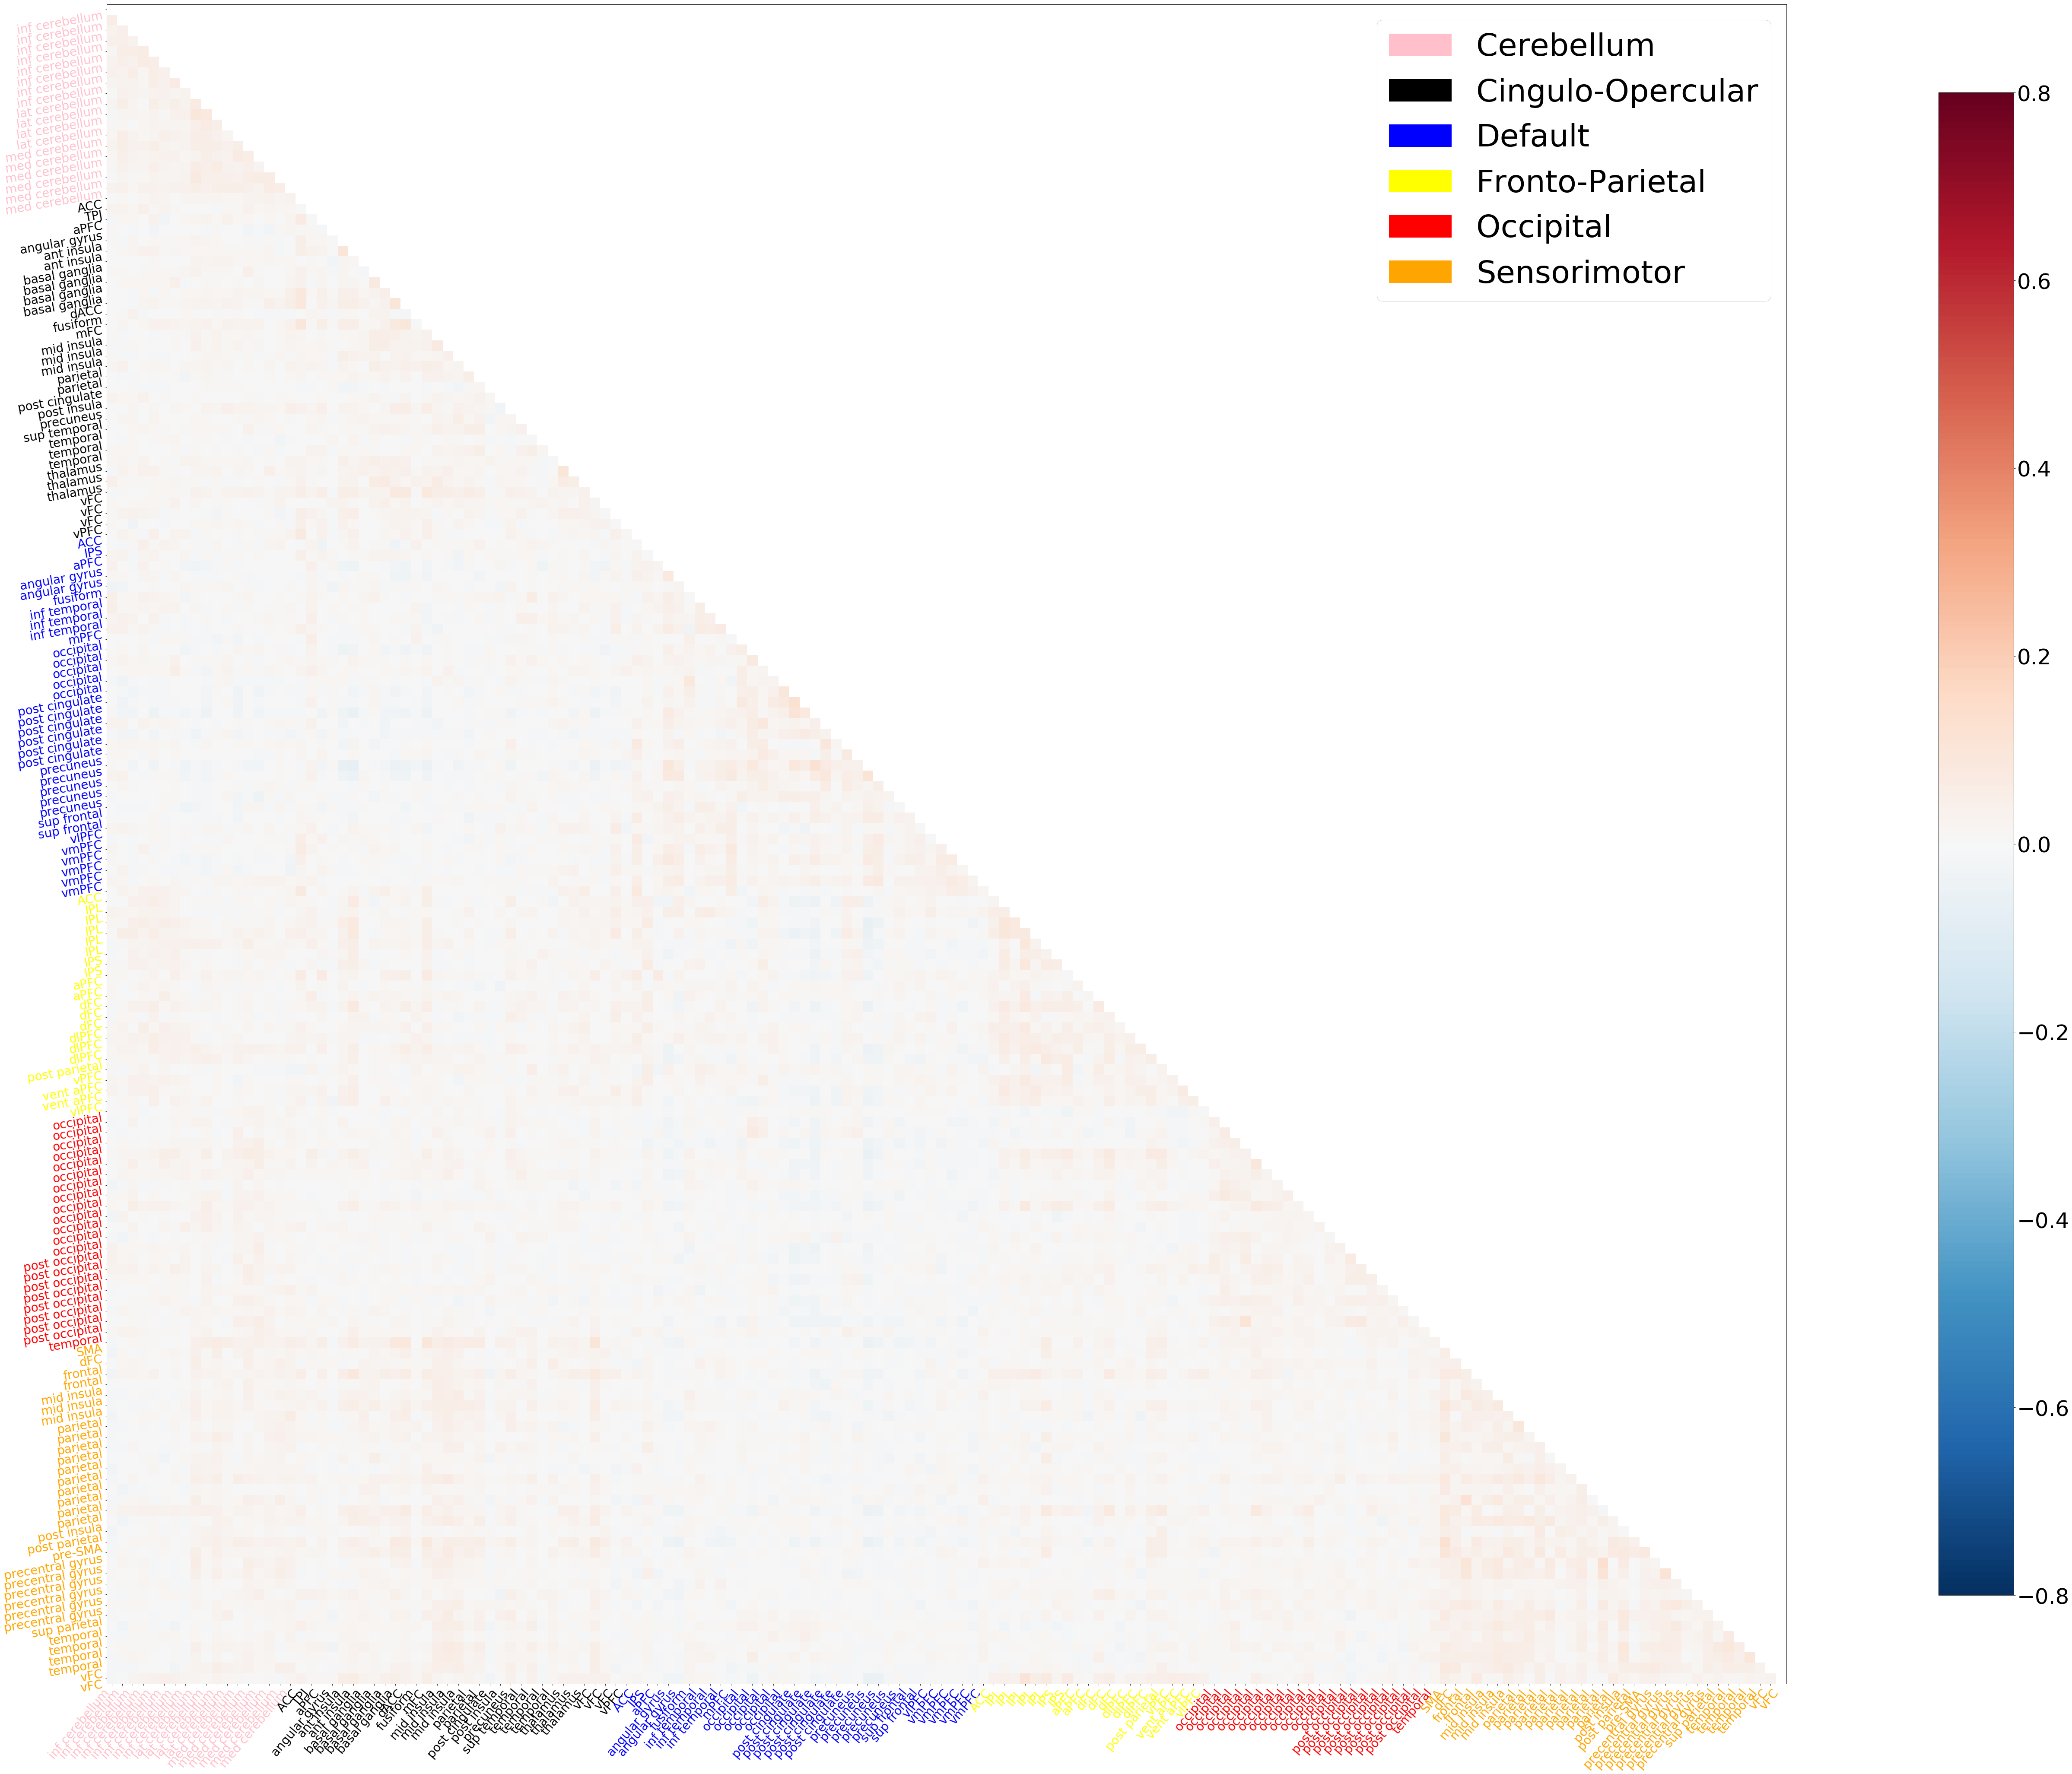

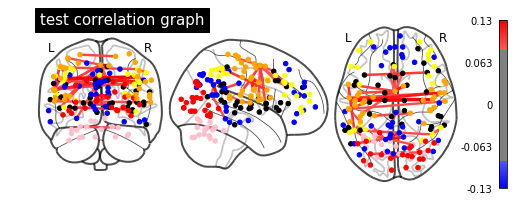

In [12]:
corr_arr = np.loadtxt('dosenbach_array.mat')

# gives color bars for the legend
patches = [mpatches.Patch(color=color, label=network) for network, color in color_dict.items()]

# zero the diagnal (already know everything is perfectly correlated with itself)
np.fill_diagonal(corr_arr, 0)

fig = plotting.plot_matrix(corr_arr, figure=(80,80), labels=labels,
                     vmax=0.8, vmin=-0.8, tri='lower')
# placing the legend
fig.axes.legend(handles=patches, prop={'size': 72})
plt.tick_params(axis='both', labelsize=28)

# increasing the fontsize of the colorbar
fig.colorbar.ax.tick_params(labelsize=50)

# recolor the tick labels
for xtick, ytick, color in zip(fig.axes.get_xticklabels(), fig.axes.get_yticklabels(), color_networks):
    xtick.set_color(color)
    ytick.set_color(color)
    
# show the matrix plot    
plt.show()

# plot the connectome
plotting.plot_connectome(corr_arr, coords, title='test correlation graph',
                         edge_threshold="99.7%", node_size=20, node_color=color_networks, colorbar=True)